<span style="font-family: Arial; font-weight:bold;font-size:2.5em;color:#330066"> 1.0 E-News Express-Project #1

<span style="font-family: Arial; font-weight:bold;font-size:2.0em;color:#a75502">1.1 Background:
    
> An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric. <br> <br>Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group).
    
<span style="font-family: Arial; font-weight:bold;font-size:2.0em;color:#a75502">1.2 Objective:

>  <a href = #obj1>1. Explore the dataset (EDA) and extract insights from the data.</a> <br>
>  <a href = #obj2>2. Statistical analysis of business data.</a> <br>
>  <a href = #obj3>3. Decide whether the new landing page is more effective to gather new subscribers</a> <br>

    
<span style="font-family: Arial; font-weight:bold;font-size:2.0em;color:#a75502">1.3 Questions to Answer:

> <a href = #q1>1. Do the users spend more time on the new landing page than the old landing page?</a> <br>
<a href = #q2> 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?</a> <br>
<a href = #q3> 3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]<br></a>
<a href = #q4> 4. Is the mean time spent on the new page same for the different language users?<br></a><br>
    **Some Additional Questions**<br>
<a href = #q5> 5. Does the converted status depend on the landing page? <br></a>
  


**using significance level = 0.05 or 5% for all tests.**
    
    
<span style="font-family: Arial; font-weight:bold;font-size:2.0em;color:#a75502">1.4 Data & Description:
    
Data |Description 
-----|----- 
**user_id**|This represents the user ID of the person visiting the website.
**group**|This represents whether the user belongs to the first group (control) or the second group (treatment).
**landing_page**|This represents whether the landing page is new or old. 
**time_spent_on_the_page**|This represents the time (in minutes) spent by the user on the landing page. 
**converted**|This represents whether the user gets converted to a subscriber of the news portal or not.
**language_preferred**|This represents the language chosen by the user to view the landing page.

<span style="font-family: Arial; font-weight:bold;font-size:2.0em;color:#005f00">
<a name='obj1'>Objective 1: EDA</a>


### Import the relevant Libraries 

In [82]:
#Import pandas and numpy libraries
import pandas as pd 
import numpy as np

In [83]:
#Import Visualization libraries
#Matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#To display matplotlib graphs inside jupyter notebook
%matplotlib inline

In [84]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

### Import the Dataset 

In [85]:
data=pd.read_csv('abtest.csv')
news=data.copy() # copy data into new variable to keep our original data untouched

### View the Data

In [86]:
news.head(10)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
5,546558,control,old,5.28,yes,English
6,546448,treatment,new,5.25,yes,French
7,546581,control,old,6.53,yes,Spanish
8,546461,treatment,new,10.71,yes,French
9,546548,control,old,2.08,no,English


### Shape of the Data

In [87]:
news.shape # using shape property

(100, 6)

Our sample has 100 rows/indices and 6 columns/features

### What are the various datatypes in our sample dataset

In [88]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


There are 4 objects, 1 integer and 1 float in the dataset<br>
In the next step: <br><br>
    <b>1. Convert all objects into categorical variables<br>
     2. Convert user_id into categorical variable 

In [89]:
# Converting the below variables into categories

news['user_id']=news['user_id'].astype('category')
news['group']=news['group'].astype('category')
news['landing_page']=news['landing_page'].astype('category')
news['converted']=news['converted'].astype('category')
news['language_preferred']=news['language_preferred'].astype('category')


In [90]:
# view the data info after conversion
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    category
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(5), float64(1)
memory usage: 7.6 KB


<b> After conversion we have 5 categories and 1 float 

### Check for missing data

In [91]:
news.isnull().any()

user_id                   False
group                     False
landing_page              False
time_spent_on_the_page    False
converted                 False
language_preferred        False
dtype: bool

the ```isnull()``` method **returned False** which we dont have any missing values in our dataset

### Describe the data

In [92]:
news.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.0,100,100,100.000000,100,100
unique,100.0,2,2,NaN,2,3
top,546592.0,treatment,old,NaN,yes,Spanish
freq,1.0,50,50,NaN,54,34
mean,NaN,NaN,NaN,5.377800,NaN,NaN
std,NaN,NaN,NaN,2.378166,NaN,NaN
min,NaN,NaN,NaN,0.190000,NaN,NaN
25%,NaN,NaN,NaN,3.880000,NaN,NaN
50%,NaN,NaN,NaN,5.415000,NaN,NaN
75%,NaN,NaN,NaN,7.022500,NaN,NaN


In [93]:
news['group'].unique() #how many unique values are in each category

['control', 'treatment']
Categories (2, object): ['control', 'treatment']

In [94]:
news['landing_page'].unique()

['old', 'new']
Categories (2, object): ['old', 'new']

In [95]:
news['converted'].unique()

['no', 'yes']
Categories (2, object): ['no', 'yes']

In [96]:
news['language_preferred'].unique()

['Spanish', 'English', 'French']
Categories (3, object): ['Spanish', 'English', 'French']

In [97]:
news['language_preferred'].value_counts() #counts of different language users 

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

**Observations**
1. We have 100 different users 
2. 2 unique groups with 50 observations in each of them, control and treatment
3. 2 landing pages are there, new and old 
4. 2 responses to whether converted into a subscriber, yes/no (Binomial). we have 54 users who became new subscribers, in other words more than 50% converted
5. 3 language speakers, Spanish, English and French (3 levels). we have 34 spanish and french users and 32 English users . The demographics is homegenously distributed
6. The mean time is 5.37 and Q2/Median time is 5.41, mean~median which indicates an normal distribution. The minimum time spent is 0.19 minutes and the maximum is 10.71. the range is not very large 

## Univariate Analysis

### Distribution of time spent on the page 

In [98]:
#define distboxplots function to visualize the variables

def distboxplots(data,column,figsize=(12,5),kde=True,bins=None):
    fig,[ax1,ax2]=plt.subplots(ncols=2,figsize=figsize)#Creating 2 subplots calles ax1 and ax2
    sns.distplot(data[column],kde=kde,bins=bins,ax=ax1)
    sns.boxplot(data=data,x=column,showmeans=True,color='orange',ax=ax2)#using seaborn to create a boxplot in ax2 plot
    #showmeans parameter will indicate the mean on the boxplot
    ax1.axvline(
        data[column].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax1.axvline(
        data[column].median(), color="black", linestyle="-"
    )  # Add median to the histogram

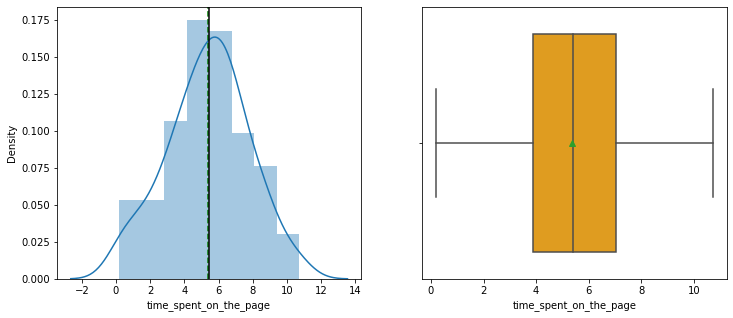

In [99]:
distboxplots(news,'time_spent_on_the_page')

* Normally distributed
* Almost 50% of the users spend between 4 to 7 minutes on the news portal, 75% of the users spend more than 4 minutes
* No outliers 
* Mean is 5.37 min and Median is 5.41 min, they are almost the same


### Visualize Converted and language variables

<AxesSubplot:xlabel='language_preferred', ylabel='count'>

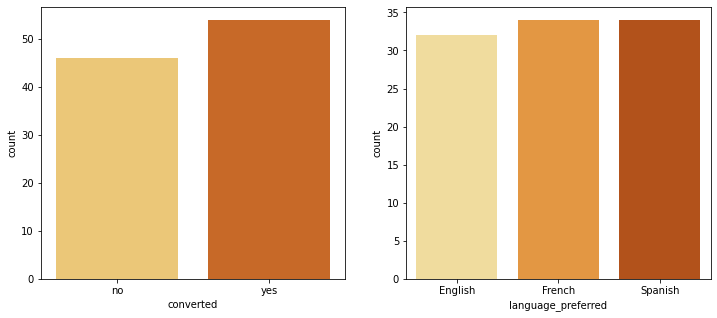

In [100]:
fig,[ax1,ax2]=plt.subplots(ncols=2,figsize=(12,5))#Creating 2 subplots calles ax1 and ax2
sns.countplot(data=news,x='converted',ax=ax1,palette='YlOrBr')
sns.countplot(data=news,x='language_preferred',ax=ax2,palette='YlOrBr')


* 54% of the users became subscribers 
* 34% spanish, 34% french, 32% English, we could say almost equally distributed

## Bivariate & Multivariate  Analysis

### Proportion of users converted for each landing page

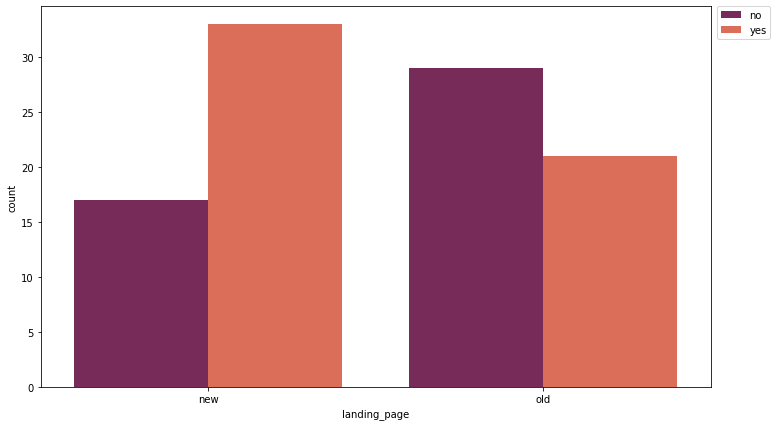

In [101]:
#define function for countplot with custom size and palette

def countplots(data,column,hue):
    plt.figure(figsize=(12,7))
    sns.countplot(data=data,x=column,hue=hue,palette='rocket')
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
    plt.show()
    
countplots(news,'landing_page','converted')

In [102]:
news[news['landing_page']=='new']['converted'].value_counts()

yes    33
no     17
Name: converted, dtype: int64

In [103]:
news[news['landing_page']=='old']['converted'].value_counts()

no     29
yes    21
Name: converted, dtype: int64

* proportion of users converted from new landing page is 33/50
* proportion of users converted from old landing page is 21/50
* proportion of users not subscribed >  users subscribed at old landing page
* proportion of users  subscribed >  users not subscribed at new landing page


### Which demographics have highest subscribers in our sample: converted vs demographics 

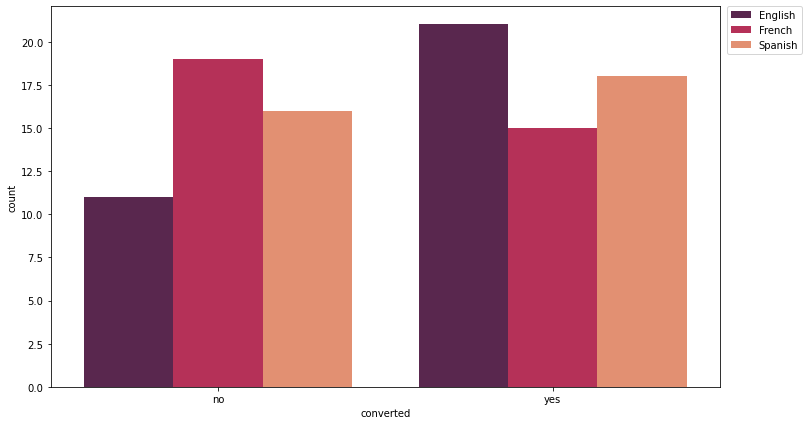

In [104]:
countplots(news,'converted','language_preferred')

In [105]:
# how many subscribers from each demographics have converted 
news[news['converted']=='yes']['language_preferred'].value_counts()

English    21
Spanish    18
French     15
Name: language_preferred, dtype: int64

* We are seeing higher number of subscribers converted among English user from the sample acros all the three demographics
* however among French users the proportion of not converted is higher

### Distribution of demographics among the groups : control group vs demographics 

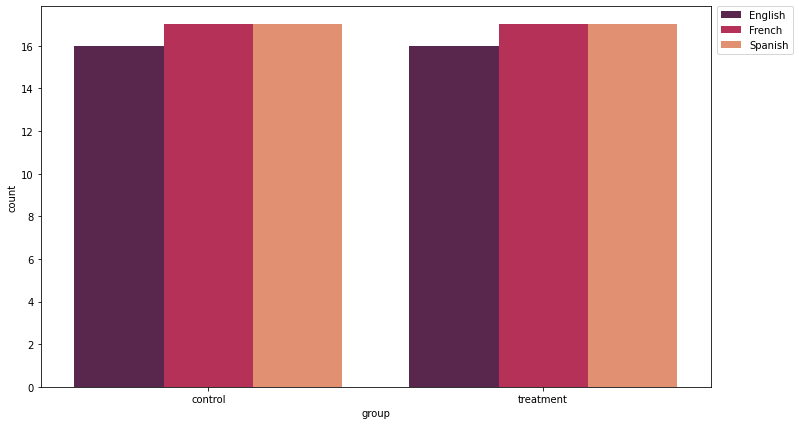

In [106]:
countplots(news,'group','language_preferred')

**Both the new and old pages have equal distribution of demographics**

### Mean time spend at the page by each language user : time vs language



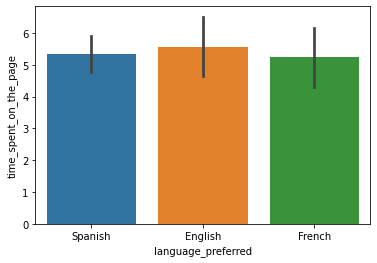

In [107]:
sns.barplot(data=data,y='time_spent_on_the_page',x='language_preferred')
plt.show()

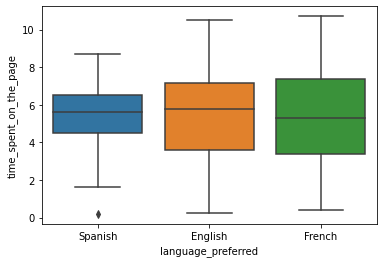

In [108]:
sns.boxplot(data=data,y='time_spent_on_the_page',x='language_preferred')
plt.show()

In [109]:
news.groupby('language_preferred').describe()

time_spent_on_the_page                                    \
                                    count      mean       std   min     25%   
language_preferred                                                            
English                              32.0  5.559063  2.621079  0.22  3.6175   
French                               34.0  5.253235  2.675413  0.40  3.3950   
Spanish                              34.0  5.331765  1.818095  0.19  4.4750   

                                          
                      50%     75%    max  
language_preferred                        
English             5.755  7.1375  10.50  
French              5.315  7.3675  10.71  
Spanish             5.605  6.5150   8.72

**Mean time spend by the 3 groups are roughly the same**

### Mean time for converison : time vs converted 

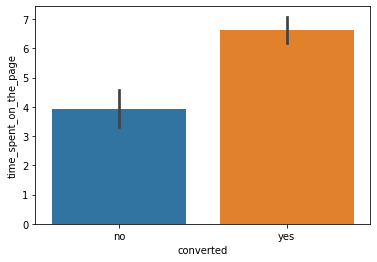

time_spent_on_the_page                                           \
                           count      mean       std   min     25%    50%   
converted                                                                   
no                          46.0  3.915870  2.226897  0.19  2.3375  3.980   
yes                         54.0  6.623148  1.708427  2.58  5.5000  6.495   

                          
              75%    max  
converted                 
no         4.9225   9.15  
yes        7.3675  10.71

In [110]:
sns.barplot(data=data,y='time_spent_on_the_page',x='converted')
plt.show()

news.groupby('converted').describe()

<AxesSubplot:xlabel='converted', ylabel='time_spent_on_the_page'>

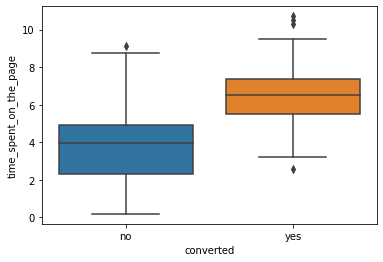

In [111]:
sns.boxplot(data=data,y='time_spent_on_the_page',x='converted')


**mean time for conversion is  6.6 minutes**

* there is a 75% chance that users who spend more than 5.5 minutes become a subscriber

###  Mean time spent on the each  page? : time Vs landing page

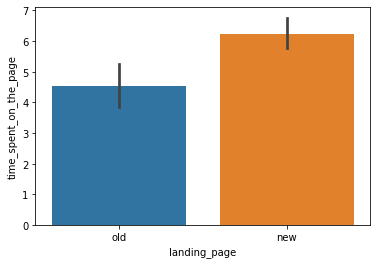

In [112]:
sns.barplot(data=data,y='time_spent_on_the_page',x='landing_page')
plt.show()

<AxesSubplot:xlabel='landing_page', ylabel='time_spent_on_the_page'>

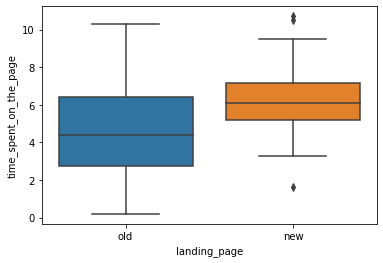

In [113]:
sns.boxplot(data=data,y='time_spent_on_the_page',x='landing_page')


In [114]:
news.groupby('landing_page').describe()

time_spent_on_the_page                                        \
                              count    mean       std   min    25%    50%   
landing_page                                                                
new                            50.0  6.2232  1.817031  1.65  5.175  6.105   
old                            50.0  4.5324  2.581975  0.19  2.720  4.380   

                             
                 75%    max  
landing_page                 
new           7.1600  10.71  
old           6.4425  10.30

* On average users spent more time at the new page
* mean time spend at new page is 6.22 minutes. The new landing page also has less variance compared to the old page**

### Mean time spent by each language at different pages : time vs language vs landing page

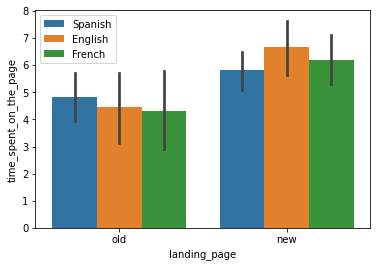

In [115]:
sns.barplot(data=data,y='time_spent_on_the_page',x='landing_page',hue='language_preferred')
plt.legend(loc='best')

In [116]:
pi=news.pivot_table(index='landing_page',columns='language_preferred',values='time_spent_on_the_page')
pi

language_preferred,English,French,Spanish
landing_page,,,
new,6.663750,6.196471,5.835294
old,4.454375,4.310000,4.828235


<AxesSubplot:xlabel='language_preferred', ylabel='landing_page'>

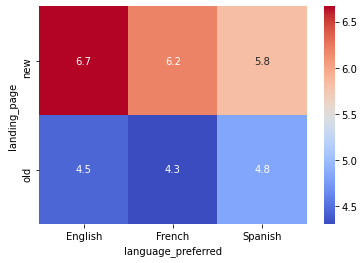

In [117]:
sns.heatmap(pi,cmap='coolwarm',annot=True)

* Mean time of English users spent at new page is 6.66
* Mean time of French users spent at new page is 6.19
* spanish users have the least mean time spent at new page, 5.83
* Mean time for spanish users spent at old page is higher than English and French users 

### Mean time for conversion for each language user : time  Vs converted vs language 

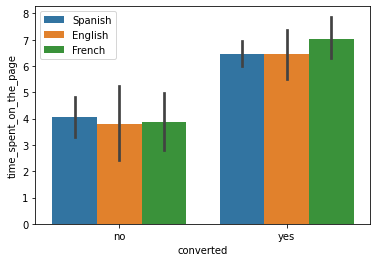

In [118]:
sns.barplot(data=data,y='time_spent_on_the_page',x='converted',hue='language_preferred')
plt.legend(loc='best')

In [119]:
pi=news.pivot_table(index='converted',columns='language_preferred',values='time_spent_on_the_page')
pi

language_preferred,English,French,Spanish
converted,,,
no,3.810909,3.861579,4.052500
yes,6.474762,7.016000,6.468889


<AxesSubplot:xlabel='language_preferred', ylabel='converted'>

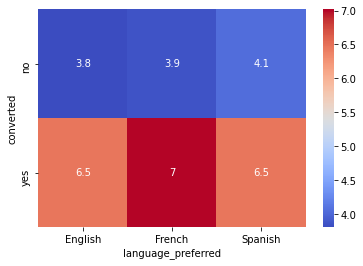

In [120]:
sns.heatmap(pi,cmap='coolwarm',annot=True)

* The mean time for conversion for English and spanish users are the same
* However mean time of conversion for french users , 7.01 is higher  than the mean time for conversion which is 6.6 

### Mean time of conversion for each landing page: time  Vs converted  vs landing page 

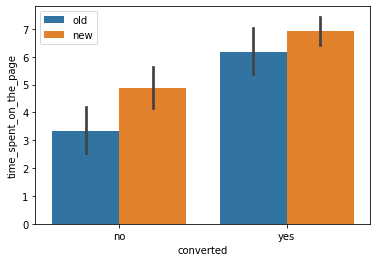

In [121]:
sns.barplot(data=data,y='time_spent_on_the_page',x='converted',hue='landing_page')
plt.legend(loc='best')

In [122]:
pi=news.pivot_table(index='converted',columns='landing_page',values='time_spent_on_the_page')
pi

landing_page,new,old
converted,,
no,4.882353,3.34931
yes,6.913939,6.16619


* Mean time for conversion at the new page is greater than old page ( 6.91>6.16)

### Mean time for conversion for different language users at different landing pages: time vs conversion vs language vs landing page

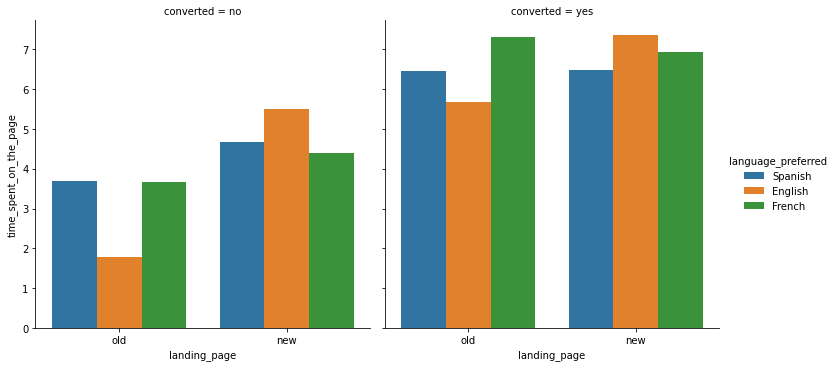

In [123]:
sns.catplot(data=data,y='time_spent_on_the_page',x='landing_page',hue='language_preferred',col='converted',kind='bar',ci=None)


* Here we see the following:
 1. Converted users have higher mean spending time regardless of the landing page and demographics 
 2. mean time for conversion for English users is higher at the new page.
 3. mean time for conversion for French users is higher at the old page
 4. mean time for conversion for the spanish users is the same
 5. The mean time spent on the old page by not converted English users is very small 
 6. For the not converted users, on average they tend to spent more time at the new page regardles of the language.

### Frequency distribution of different language users across the group and based on their converted status 

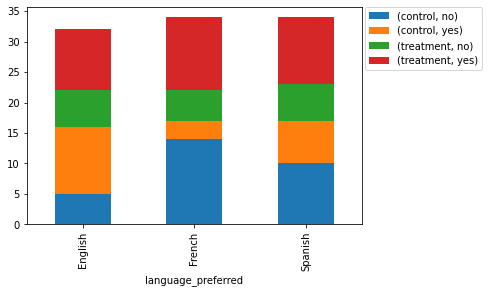

In [124]:
cont= pd.crosstab(news.language_preferred,[news['group'],news['converted']]).plot(kind='bar',stacked='True')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)


In [125]:
cont

<AxesSubplot:xlabel='language_preferred'>

In [126]:
sns.heatmap(cont,cmap='coolwarm',annot=True)

ValueError: Must pass 2-d input. shape=()

* 82.3% of french users in the control group were not converted 
* 70.5% of french users were converted at the new landing page
* 58.8% of spanish users in the ontrol group were not converted 
* 64.7% of spanish users were converted at the new landing page 

* for English users we have majority converted at both groups, however old landing page has slightly highe conversion rate based on the sample

* we can say that conversion rate at the new landing page is higher for both french and spanish users than their old counter parts
* For english user conversion rate is similar at both landign pages, however we need more data to make a solid conclusion



<span style="font-family: Arial; font-weight:bold;font-size:2.0em;color:#a75502">Observations and Insights from EDA:


* 54% of the users converted
    * 61.1% (33/54) of the converted user are from new landing page 
    * 38.8% (21/54) of the converted users are from old landing page    
    * 38.8% of converted users are English (21/54)
    * 33.33% of converted are Spanish (18/54)
    * 27.7% of converted users are French (15/54)
        <br>
        
    1) *Higher conversion is seen at the new landing page from the sample*<br>
    2) *Most of our converted users prefer English, followed by spanish at a close second*
----------------------------------------------------------------------------------------------------------------------------

* We have higher conversion rate for all three language users at the new landing page.
    * 64.7% of spanish users served with new landing page were converted 
    * 70.5% of french users served with new landing page were converted 
    * 62.5% of English users served with new landing page were converted
    
    * 41.1% of spanish served with old landing page were converted 
    * only 17% of french users served with old landing page were converted 
    * 68.75% of English users served with old landing page were converted
        <br>
        
    1) *Data shows a high conversion for french users at the new landing page*<br>
    2) *Similarly Spanish users also showing higher conversion at new landing page*<br>
    3) *English users have almost the same conversion at both landing page with old landing page slightly higher*
----------------------------------------------------------------------------------------------------------------------------


* The users mean time spent on the portal is 5.37 minutes 
* The users mean time spent on new page is 6.2 min 
* The users mean time spent on old page is 4.5 min 
* The users mean time for conversion was found to be 6.62 minutes

* The mean time for conversion for English and spanish users are the same around 6.4 minutes
* However mean time of conversion for french users , 7.01 is higher  than the mean time for conversion which is 6.6 min
    
* Spanish users has  the least mean time spend at the new landing page and highest mean time at the old page.
* English user has the highest mean time at the new page 
* French user has the lowest mean time at the old page.

    1) *Data tells that more time spent on the portal leads to a conversion*<br>
    2) *Data shows that the users are spending more time at the new landing page on an average*<br>
    3) *We can observe from the data that French users spent the least time at the old page and highest conversion at the new page.
    it looks like french user prefer the new landing page over the old one*<br>
    4) *similarly for spanish users more conversion happens at new landing page, however their average time at the new page is smaller than english and french users*<br>
    5) *for english users conversion occurs at almost similar rate at both pages. however their mean spending time at the new page is much higher than the mean time at the old page*<br>
    6) *The mean time for conversion at the new landing page is higher than the old one.*<br>


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#a75502">Short summary:

*All signs from the data tell us that users are spending longer time at the new page and we got more new subscribers from the new page. The time spent on the page and getting converted are showing a positive relation. Among the various language preferences,  the new landing page has made a very significant impact on french users in getting them converted as well us upon the spanish users. however for english users, we see that there not much significant change in conversion between the old and new page. However whether the data gives enough statistical evidence to reject or not reject our claims is another story. We will we see how to do that in the next section*

<span style="font-family: Arial; font-weight:bold;font-size:2.0em;color:#005f00">
<a name='obj2'>Objective 2: Statistical Analysis</a>


Before we start our statistical analysis lets take a step back and glance at the things we know and dont know

What we know |What we dont know 
-----|----- 
The level of significance = 0.05|Population mean/mu
Sample size >30 (=100)| population standard deviation/sigma
Sample is randomly selected|
observations are independent of each other*| 

Since we have 100 different users we assume their activities are independent of each other *



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#005f00">
<a name ='q1'>Question 1. Do the users spend more time on the new landing page than the old landing page?</a> <br>

### Let's write the null and alternative hypothesis. : **We will use the 2 sample Two Independent Sample T-test for Equality of Means - Unequal Std Dev**<br>
Let $\mu_1, \mu_2$ be the mean time of new and old landing pages respectively.

We will test the null hypothesis, users spend equal amount of time at both landing pages

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis,users spend more time at the new landing page than the old landing page

>$H_a:\mu_1>\mu_2$

We Have 2 groups with new landing page and old landing pages , each sample with 50 observations

In [ ]:
new=news[news['landing_page']=='new']
old=news[news['landing_page']=='old']

### Observe the dataframe head from new and old 

In [ ]:
new.head(10)

In [ ]:
old.head(10)

### Mean and std of the time spent on the new and old landing pages  

In [ ]:
print('The mean time at old landing page is ',old['time_spent_on_the_page'].mean())
print('The mean time at new landing page is ',new['time_spent_on_the_page'].mean())
print('The std for old landing page is ',old['time_spent_on_the_page'].std())
print('The std for new landing page is ',new['time_spent_on_the_page'].std())

Here we see that the standard deviation between the 2 samples are unequal<br>
**We will use the 2 sample Two Independent Sample T-test for Equality of Means - Unequal Std Dev**

### Import the libraries for statistical analysis

In [ ]:
from scipy.stats import ttest_ind

### Time distributions for both groups

In [ ]:
fig,[ax1,ax2]=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.distplot(new['time_spent_on_the_page'],ax=ax1)
sns.distplot(old['time_spent_on_the_page'],ax=ax2)

ax1.axvline(new['time_spent_on_the_page'].mean(), color='b', linestyle='dashed', linewidth=1) # meantime spent at new page in blue
ax1.axvline(old['time_spent_on_the_page'].mean(), color='g', linestyle='dashed', linewidth=1)# mean time spent on old page in green

ax2.axvline(old['time_spent_on_the_page'].mean(), color='g', linestyle='dashed', linewidth=1)# mean time spent on old page in green
ax2.axvline(new['time_spent_on_the_page'].mean(), color='b', linestyle='dashed', linewidth=1)# meantime spent at new page in blue



* Time spent on the new and old landing pages are normally distributed,
* Mean time spent on new page > Mean time spend at old page 
* The data is continous

### Let's test whether the T-test assumptions are satisfied or not


* Continuous data - Yes, the time spent  is measured on a continuous scale.
* Normally distributed populations - Yes, the sample size >30, so CLT allows us to assume a normal distriution
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent * populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

### Find the p value

In [ ]:
test_stat, p_value = ttest_ind(new['time_spent_on_the_page'], old['time_spent_on_the_page'], equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

### Visualise the p value and significance level on a normal distribution

In [ ]:
#Create a visualisation function for one tailed hypothesis showign the p value 

def onetailedhypo(pval):
    # import the required function
    from scipy.stats import norm

    # find the critical values
    critical_val1 = norm.ppf(1-(0.05))# Level of significance =0.05

    # plot the rejection and acceptance region
    # We are plotting the distributions here to better visualize the calculations
    x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
    plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
    plt.axvline(x = critical_val1, c = 'r') # draw a vertical red line through the mentioned point
    x1 = np.linspace(critical_val1, 4, 50) # create an array of 50 numbers starting from the critical value and ending at 4
    plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r') # fill the area under the curve after the critical value with red color
    pvalue=norm.ppf((1-pval))
    plt.axvline(x = pvalue, c = 'g') # draw a vertical red line through the pvalue

    plt.annotate('Reject Null', (2.2, 0.20)) # annotate the mentioned text at the mentioned location
    plt.annotate('  Do Not Reject\n        Null', (-1, 0.20)) # annotate the mentioned text at the mentioned location
    plt.show() # display the plot

In [ ]:
onetailedhypo(0.0001392381225166549)# calling the user defined function

The green line is the p value which lies in the Rejection area

### Insight 

The p-value is smaller than our significance level and lie in the rejection area, hence we have enough statistical evidence to **reject the null hypothesis**.We have enough staitistical evidence telling us that **users spend more time on the new landing page than the old landing page** which justifies the mean times for both pages

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#005f00">
<a name='q2'>Question 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?</a>


### Let's write the null and alternative hypothesis:**Here we will use a 2 proportion z test** 
Let $p_1,p_2$ be the proportions of users who get converted at new page and old page respectively.

we will test the null hypothesis, the conversion rate is same for both landing pages

>$H_0:p_1 =p_2$

against the alternate hypothesis, conversion rate for the new page greater than the conversion rate for the old page

>$H_a:p_1 > p_2$

### Lets look at the Data

In [ ]:
new.head()

In [ ]:
old.head()

### Proportion of user converted at new and old pages

In [ ]:
print('Proportion of user converted at new page,p1=',sum(new['converted']=='yes'),'/50')
print('Proportion of user converted at old page,p2=',sum(old['converted']=='yes'),'/50')


Data says that the proportion of users getting converted at new page is higher. lets do statistical analysis and find out more<br>
**Here we will use a 2 proportion z test** 

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a user gets converted or not 
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =25 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

### Let's find the p-value


In [127]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of converted users
converted_count = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converted_count, nobs,alternative='larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


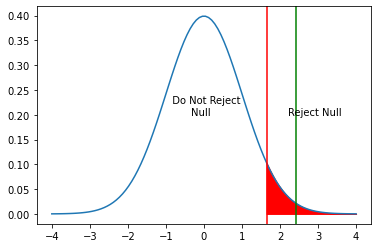

In [129]:
onetailedhypo(0.008026308204056278)

### Insight 

The p-value falls in the rejection region as is smaller than the level of significance. we have enough statistical evidence to **reject the null hypothesis**. we have enough statistical evidence to say **conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?**

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#005f00">
<a name='q3'>Question 3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]</a>


### Data and variables

In [ ]:
news.head()

In [ ]:
news.info()

We have find the dependency of converted status on the preffered language, we can see that both of these are **categorical variables**

### Frequency distribution/contingency table

In [ ]:
cont=pd.crosstab(news['converted'],news['language_preferred']).plot(kind='bar',stacked='True')# crosstab method to create contingency tables
cont

### Let's write the null and alternative hypothesis : **We will perform a chi-square test for indipendence**


We will test the null hypothesis

>$H_0:$ converted status is independent of language preffered.

against the alternate hypothesis

>$H_a:$ converted status depends on language preffered.

### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

**We will perform a chi-square test for indipendence**

### Lets find the p-value

In [ ]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(cont)
print('The p-value is', p_value)

### Insights

The p-value is greater than the level of significance, so we **fail to reject the null hypothesis**. We do not have enough statistical evidence to say that the converted status depend on the language preffered

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#005f00">
<a name='q4'>Question 4. Is the mean time spent on the new page same for the different language users?</a>


### Data 

In [ ]:
new.head()# looking at the sample with new page 

### Let's write the null and alternative hypothesis:one way- ANOVA test

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the page  for English,French and Spanish users respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one language users time spent on the page is different from the rest.


In [ ]:
new['language_preferred'].value_counts() # frequency of various language speakers 

In [ ]:
### mean Time  for each language speakers

print(new.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = new, hue = 'language_preferred')
a.set_title("Time spent on the new page w.r.t. language preffered (3 levels)", fontsize=15)
plt.show()

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follows a normal distribution

In [ ]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(new['time_spent_on_the_page']) 
print('The p-value is', p_value)

Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( new['time_spent_on_the_page'][new['language_preferred']=="English"], 
                                   new['time_spent_on_the_page'][new['language_preferred']=="French"], 
                                   new['time_spent_on_the_page'][new['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.



### Let's find the p-value

In [ ]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(new.loc[new['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              new.loc[new['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              new.loc[new['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

In [ ]:
onetailedhypo(0.43204138694325955) # green line is the test statistic/p-value

### Insight

As the p-value is much larger than the level of significance we **fail to reject the null hypothesis**. we do not have enough statistical evidence to say at least on of the language groups' mean time spent on the page is different

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#005f00">
<a name='q5'>Question5. Does the converted status depend on the landing page?</a>


### Data

In [ ]:
news.head()

In [ ]:
news.info()

* Converted status and the landing page are both categorical variables ,
* We wil use **Chi square test for independence**

### Let's write the null and alternative hypothesis : **We will perform a chi-square test for indipendence**


We will test the null hypothesis

>$H_0:$ converted status is independent of landing page.

against the alternate hypothesis

>$H_a:$ converted status depends on landing page.

### Frequency distribution/contingency table

In [ ]:
cont=pd.crosstab(news['converted'],news['landing_page'])# crosstab method to create contingency tables
cont

### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

**We will perform a chi-square test for indipendence**

### Lets find the p-value

In [ ]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(cont)
print('The p-value is', p_value)

### Insight

The p value is less than the level of significance and we can **reject the null hypothesis**. there is enough statistical evidence to say that the **converted status depends on the landing page**. The data tells us that there are more converted people from new landing page than the old page


<span style="font-family: Arial; font-weight:bold;font-size:2.0em;color:#005f00">
<a name='obj3'>Objective 3. Decide whether the new landing page is more effective to gather new subscribers</a>


1) *From the 5 question we have answered we now have statistical evidence to say that users spend more time on the new landing page thank the old landing page. Also EDA shows that users with higher spending time tend to get converted, infact more than 75% of users got converted when they spend more than 5.5 minutes*<br>
2) *We have statistical evidence to say that conversion rate is higher for users at new page than the old page*<br>
3) *We have statistical evidence to say that converted status depend on the landing page as well.*<br>
4) *Statistical evidence tells that whether a user becomers a subscriber does not depend on the language preference
5) *statistical eveidence tells that all users spend equal amount of time at the new page*

**In the light of these statistical evidences, it is safe to say that the new landing page is more effective to gather new subscribers.**